In [ ]:
## auxiliary function to download food safety data from ratings.food.gov.uk

import pandas as pd
from urllib.request import urlopen
import xml.etree.ElementTree as ET
from collections import OrderedDict
from io import StringIO

def download_foodsafety_data_and_convert_to_csv(xml_id='FHRS776en-GB.xml', out_fpath='food_safety.csv'):
    """
    Downloads food safety data given the local authority id which can be 
    found at http://ratings.food.gov.uk/open-data/en-GB 
    """
    url = 'http://ratings.food.gov.uk/OpenDataFiles/{}'.format(xml_id)
    response = urlopen(url)
    content = StringIO(response.read().decode())

    def get_info_from_xml():
        etree = ET.parse(content)
        root = etree.getroot()
        for enstab in root.iter('EstablishmentDetail'):
            d = OrderedDict()
            for item in enstab:
                if item.tag == 'Geocode':
                    for ll_info in item:
                        d[ll_info.tag] = float(ll_info.text)
                else:
                    d[item.tag] = item.text
            yield d

    df = pd.DataFrame(list(get_info_from_xml()))
    df.to_csv(out_fpath, index=None)
    
download_foodsafety_data_and_convert_to_csv(xml_id='FHRS776en-GB.xml', out_fpath='food_safety_Glasgow.csv')

# Pandas
The data analyst best friend. 

Learn more at https://pandas.pydata.org

In [2]:
import pandas as pd

## Reading in data

In [37]:
df = pd.read_csv('food_safety_Glasgow.csv')

For loding data from excel..
```python
excel_file = pd.ExcelFile('path_to_excel.xlsx')
df = pd.read_excel(excel_file, 'Sheet1')
```
for other files try typing ```pd.read_``` and then hit the tab key

## Exploring data

In [4]:
df.head(2)

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine2,AddressLine3,PostCode,RatingValue,RatingKey,...,LocalAuthorityCode,LocalAuthorityName,LocalAuthorityWebSite,LocalAuthorityEmailAddress,Scores,SchemeType,NewRatingPending,Longitude,Latitude,AddressLine1
0,946085,15/00071/COM,(DC1) Donut Coffee (Supreme Group),Mobile caterer,7846,105 Clydeholm Road,Glasgow,G14 0QQ,Awaiting Inspection,fhis_awaiting_inspection_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.337705,55.870607,NaN
1,36328,10/00926/COM,(Nisa) News 24,Retailers - other,4613,68 Gordon Street,Glasgow,G1 3RS,Improvement Required,fhis_improvement_required_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.257722,55.860794,NaN


In [5]:
df.columns

Index(['FHRSID', 'LocalAuthorityBusinessID', 'BusinessName', 'BusinessType',
       'BusinessTypeID', 'AddressLine2', 'AddressLine3', 'PostCode',
       'RatingValue', 'RatingKey', 'RatingDate', 'LocalAuthorityCode',
       'LocalAuthorityName', 'LocalAuthorityWebSite',
       'LocalAuthorityEmailAddress', 'Scores', 'SchemeType',
       'NewRatingPending', 'Longitude', 'Latitude', 'AddressLine1'],
      dtype='object')

In [6]:
df.shape   # number rows and columns

(5381, 21)

## Slicing data

In [9]:
# df[xx] by default gets you column/s
df[['RatingValue', 'Longitude']]

,RatingValue,Longitude
0,Awaiting Inspection,-4.337705
1,Improvement Required,-4.257722
2,Pass,-4.136909
3,Pass,-4.258732
4,Pass,-4.256026
5,Awaiting Inspection,-4.205416
6,Pass,-4.248843
7,Pass,-4.365896
8,Pass,-4.334799
9,Pass,-4.310922


In [18]:
df = pd.DataFrame({'A': range(5), 'B': list('euskg')}).set_index('B')
df['C'] = df.A *8
df

,A,C
B,,
e,0,0
u,1,8
s,2,16
k,3,24
g,4,32


getting a slice of the data
```python
.loc[index_name/s, column_names/s]       # by label
.iloc[index_number/s, column_numbers/s]  # by position

.loc[a:b] # includes both a and b (as they could be any type, e.g. strings)
.iloc[a:b] # includes only a
```

In [61]:
df.loc[3]   # by Label: getting the line with index named '3', all columns
df.iloc[3]  # by Position: getting the 4th line, all columns

# in this case the index name and count coincide..

FHRSID                                              36363
LocalAuthorityBusinessID                     10/01018/COM
BusinessName                  1 Call Direct Staff Canteen
BusinessType                      Restaurant/Cafe/Canteen
BusinessTypeID                                          1
AddressLine2                       116 West Regent Street
AddressLine3                                      Glasgow
PostCode                                           G2 2QD
RatingValue                                          Pass
RatingKey                                 fhis_pass_en-GB
RatingDate                                     2015-11-20
LocalAuthorityCode                                    776
LocalAuthorityName                           Glasgow City
LocalAuthorityWebSite           http://www.glasgow.gov.uk
LocalAuthorityEmailAddress     food.safety@glasgow.gov.uk
Scores                                                NaN
SchemeType                                           FHIS
NewRatingPendi

In [ ]:
df.loc[3:5]                 # getting from line 3 to line 5, all columns
df.loc[3:5, 'RatingValue']  # getting from line 3 to line 5, only 'RatingValue' column

In [38]:
df[ df['BusinessName'] == 'Starbucks']

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine2,AddressLine3,PostCode,RatingValue,RatingKey,...,LocalAuthorityCode,LocalAuthorityName,LocalAuthorityWebSite,LocalAuthorityEmailAddress,Scores,SchemeType,NewRatingPending,Longitude,Latitude,AddressLine1
4227,948437,17/00122/COM,Starbucks,Restaurant/Cafe/Canteen,1,50 Allerdyce Road,Glasgow,G15 6RX,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.377490,55.905094,NaN
4228,128339,58270/0027/0/000,Starbucks,Restaurant/Cafe/Canteen,1,27 Sauchiehall Street,Glasgow,G2 3AT,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.254819,55.864208,NaN
4229,15081,05/00103/COM,Starbucks,Restaurant/Cafe/Canteen,1,140 Buchanan Street,Glasgow,G1 2JR,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.253480,55.861501,NaN
4230,1174284,19/00670/COM,Starbucks,Restaurant/Cafe/Canteen,1,55 St Enoch Square,Glasgow,G1 4BW,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.254458,55.857412,Unit 32B


In [39]:
df[ df['BusinessName'].str.contains('Starbucks') ]

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine2,AddressLine3,PostCode,RatingValue,RatingKey,...,LocalAuthorityCode,LocalAuthorityName,LocalAuthorityWebSite,LocalAuthorityEmailAddress,Scores,SchemeType,NewRatingPending,Longitude,Latitude,AddressLine1
2,19429,06/00508/COM,(Starbucks),Restaurant/Cafe/Canteen,1,390 Provan Walk,Glasgow,G34 9DL,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.136909,55.872982,NaN
963,785113,15/00464/COM,Cineworld Cinemas And Starbucks,Takeaway/sandwich shop,7844,763 Barrhead Road,Glasgow,G53 6AF,Awaiting Inspection,fhis_awaiting_inspection_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.342073,55.822897,Unit 42 - Cinema
4227,948437,17/00122/COM,Starbucks,Restaurant/Cafe/Canteen,1,50 Allerdyce Road,Glasgow,G15 6RX,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.377490,55.905094,NaN
4228,128339,58270/0027/0/000,Starbucks,Restaurant/Cafe/Canteen,1,27 Sauchiehall Street,Glasgow,G2 3AT,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.254819,55.864208,NaN
4229,15081,05/00103/COM,Starbucks,Restaurant/Cafe/Canteen,1,140 Buchanan Street,Glasgow,G1 2JR,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.253480,55.861501,NaN
4230,1174284,19/00670/COM,Starbucks,Restaurant/Cafe/Canteen,1,55 St Enoch Square,Glasgow,G1 4BW,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.254458,55.857412,Unit 32B
4231,79750,19220/0254/0/000,Starbucks Coffee,Restaurant/Cafe/Canteen,1,254 Byres Road,Glasgow,G12 8SH,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.293324,55.875370,NaN
4232,31176,09/00568/COM,Starbucks Coffee,Restaurant/Cafe/Canteen,1,38 George Square,Glasgow,NaN,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.250945,55.860849,NaN
4233,98562,31070/0009/0/000,Starbucks Coffee,Restaurant/Cafe/Canteen,1,9 Exchange Place,Glasgow,G1 3AN,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.253746,55.860022,NaN
4234,618975,13/01016/COM,Starbucks Coffee,Takeaway/sandwich shop,7844,79 Gordon Street,Glasgow,G1 3SQ,Awaiting Inspection,fhis_awaiting_inspection_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.258211,55.859302,Starbucks Mobile A


In [40]:
df[ df['Longitude']<50 ]

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine2,AddressLine3,PostCode,RatingValue,RatingKey,...,LocalAuthorityCode,LocalAuthorityName,LocalAuthorityWebSite,LocalAuthorityEmailAddress,Scores,SchemeType,NewRatingPending,Longitude,Latitude,AddressLine1
0,946085,15/00071/COM,(DC1) Donut Coffee (Supreme Group),Mobile caterer,7846,105 Clydeholm Road,Glasgow,G14 0QQ,Awaiting Inspection,fhis_awaiting_inspection_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.337705,55.870607,NaN
1,36328,10/00926/COM,(Nisa) News 24,Retailers - other,4613,68 Gordon Street,Glasgow,G1 3RS,Improvement Required,fhis_improvement_required_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.257722,55.860794,NaN
2,19429,06/00508/COM,(Starbucks),Restaurant/Cafe/Canteen,1,390 Provan Walk,Glasgow,G34 9DL,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.136909,55.872982,NaN
3,36363,10/01018/COM,1 Call Direct Staff Canteen,Restaurant/Cafe/Canteen,1,116 West Regent Street,Glasgow,G2 2QD,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.258732,55.863606,Storey Ground
4,779621,15/00460/COM,1 Level Up,Restaurant/Cafe/Canteen,1,34 St Enoch Square,Glasgow,G1 4DF,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.256026,55.857455,Storey 1/2
5,612666,13/00979/COM,1 Stop News,Retailers - other,4613,366 Cumbernauld Road,Glasgow,G31 3NQ,Awaiting Inspection,fhis_awaiting_inspection_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.205416,55.862444,NaN
6,1152792,19/00248/COM,100 Fusion Food Supermarket,Retailers - other,4613,186 Trongate,Glasgow,NaN,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.248843,55.857583,NaN
7,96596,29500/0310/0/000,101 Convenience Store,Retailers - other,4613,310 Dyke Road,Glasgow,G13 4QU,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.365896,55.892573,NaN
8,124676,53150/1587/0/000,101 Convenience Store,Retailers - other,4613,1587 Paisley Road West,Glasgow,G52 3QY,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.334799,55.845910,NaN
9,772027,15/00388/COM,1051 GWR,Restaurant/Cafe/Canteen,1,1051 Great Western Road,Glasgow,G12 0XP,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.310922,55.884459,NaN


## Performing math

In [41]:
subset = df.loc[:3, 'Latitude']
subset

0    55.870607
1    55.860794
2    55.872982
3    55.863606
Name: Latitude, dtype: float64

In [42]:
(subset + 100) * 2

0    311.741214
1    311.721588
2    311.745964
3    311.727212
Name: Latitude, dtype: float64

## Plotting

In [43]:
# remember to activate the inline option to see the plot inside the notebook
%matplotlib inline

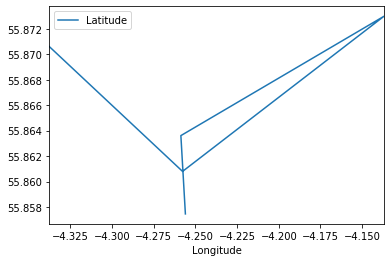

In [44]:
# line plot
df.iloc[:5].plot(x='Longitude', y='Latitude')

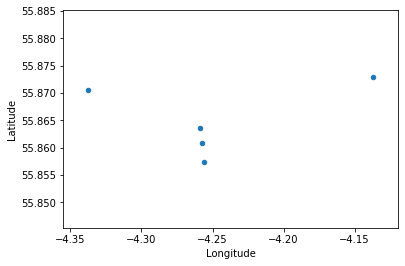

In [46]:
# scatter plot
df.iloc[:5].plot.scatter(x='Longitude', y='Latitude')

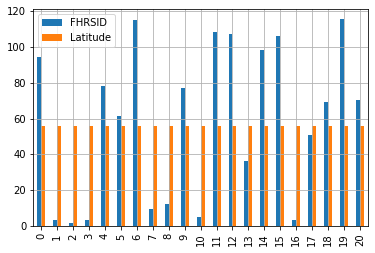

In [60]:
# line plot
y = df.loc[:20, ['FHRSID', 'Latitude']]
y['FHRSID'] = y['FHRSID'] / 10000
y.plot.bar(grid=True)
# .plot.